In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import glob
import statsmodels.api as sm

In [95]:
policy_scores = pd.read_csv('State_Policy_Scores.csv')

def get_data(kw):
    filename = glob.glob('Train_Data/' + kw + "*.csv")[0]
    df = pd.read_csv(filename, index_col=0)
    df['Score'] = [(policy_scores.iloc[np.where(x == policy_scores.STATE)[0][0]].Score) for x in df.State]

    return df

def subset_date(df, date):
    inds = [x[0:7] == date for x in df.Date]   
    return df[inds]

def subset_date_w(df, wave):
    Wave_dates = {'1': ['2020-01', '2020-02'], '2': ['2020-03', '2020-04'], '3': ['2020-05', '2020-06']}
    inds = [(x[0:7] == Wave_dates[wave][0] or x[0:7] == Wave_dates[wave][1]) for x in df.Date]   
    return df[inds]

#mod = sm.OLS(spector_data.endog, spector_data.exog)

#In [6]: res = mod.fit()

#In [7]: print(res.summary())

def summarize_models(kw, dates, wave=False):
    df = get_data(kw)

    for date in dates:
        if wave:
            df_sub = subset_date_w(df, date)
        else:
            df_sub = subset_date(df, date)

        X = (df_sub.Score.values).reshape(-1,1)
        y =  df_sub.Count.values
        X = sm.add_constant(X)

        mod = sm.OLS(y, X)
        res = mod.fit()
        print(res.summary())


def run_models(kw, dates, wave=False, plot = False):
    df = get_data(kw)
    li = []

    if plot:
        fig, axs = plt.subplots(len(dates)//3, 3, figsize = (20, 5))
        fig.suptitle(kw + ' Tweet Volume vs State Alcohol Policy Score')
        #fig.tight_layout()
        fig.subplots_adjust(hspace = .7)
        axs = axs.ravel()

    for i, date in enumerate(dates):
        if wave:
            df_sub = subset_date_w(df, date)
        else:
            df_sub = subset_date(df, date)

        X = (df_sub.Score.values).reshape(-1,1)
        y =  df_sub.Count.values

        reg = LinearRegression().fit(X, y)
        li.append(pd.DataFrame({'Date': [date], 'Coef': reg.coef_, 'Score': [reg.score(X, y)]}))

        if plot:
            axs[i].scatter(X, y, c='black') 
            axs[i].plot(X, reg.predict(X))
            axs[i].set_title(date)
            axs[i].set(xlabel='Policy Score', ylabel='Tweet Volume')
 
    if False:
        if wave:
            fig.savefig('figures/Regression/' + kw + '_waves.png')
        else:
            fig.savefig('figures/Regression/' + kw + '.png')
    return pd.concat(li, axis=0, ignore_index=True)


In [100]:
dates = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06']
waves = ['1', '2', '3']

#run_models('LIQUOR', waves, wave=True, plot=True)
summarize_models('LIQUOR', waves, wave = True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.008380
Date:                Mon, 12 Jul 2021   Prob (F-statistic):              0.927
Time:                        16:38:25   Log-Likelihood:                 672.03
No. Observations:                 102   AIC:                            -1340.
Df Residuals:                     100   BIC:                            -1335.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.610      0.5

(array([ 2., 14., 10., 18., 28., 16.,  4.,  6.,  2.,  2.]),
 array([25.6 , 29.83, 34.06, 38.29, 42.52, 46.75, 50.98, 55.21, 59.44,
        63.67, 67.9 ]),
 <BarContainer object of 10 artists>)

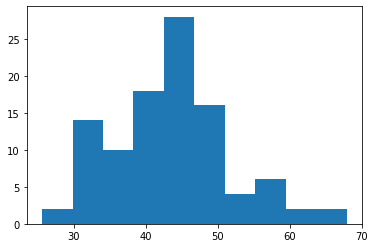

In [26]:
df_beer = get_data('BEER')
df_beer = subset_date_w(df_beer, '3')

df_beer.head()
plt.hist(df_beer.Score)
#plt.scatter((df_beer.Count), (df_beer.Score))

In [66]:
df_beer = subset_date(df_beer, '2020-03')
X = (df_beer.Score.values).reshape(-1,1)
y = df_beer.Count.values

reg = LinearRegression().fit(X, y)

In [67]:
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.031211996685444388
[3.87434852e-07]
6.044437552444985e-06


In [60]:
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.000494824196981769
[-1.26953529e-06]
0.0006450575514453292
